In [157]:
import pandas as pd
import numpy as np
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [163]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [164]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [186]:
df.drop(df[df.TotalCharges==' '].index.values,inplace=True)

In [187]:
df[df.TotalCharges==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [192]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [190]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [191]:
df.TotalCharges.dtypes

dtype('float64')

In [193]:
tenure_Churn_no=df[df.Churn=='No'].tenure
tenure_Churn_yes=df[df.Churn=='Yes'].tenure


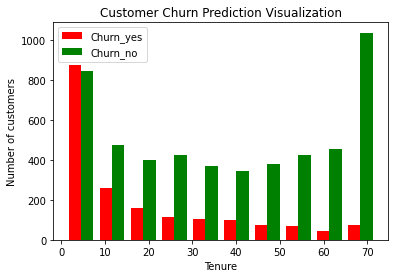

In [194]:
plt.hist([tenure_Churn_yes,tenure_Churn_no],color=['red','green'],label=['Churn_yes','Churn_no'])
plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()

In [195]:
totalcharges_Churn_no=df1[df.Churn=='No'].MonthlyCharges
totalcharges_Churn_yes=df1[df.Churn=='Yes'].MonthlyCharges

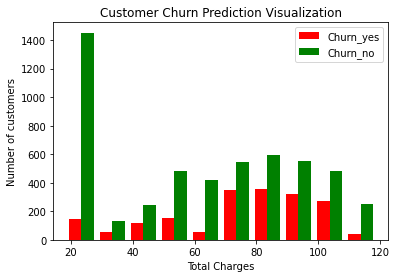

In [196]:
plt.hist([totalcharges_Churn_yes,totalcharges_Churn_no],color=['red','green'],label=['Churn_yes','Churn_no'])
plt.xlabel('Total Charges')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()

In [197]:
def print_unique_column_values(dataset):
    for column in dataset:
        if dataset[column].dtypes=='object':
            print(f'{column} : {dataset[column].unique()}')

In [198]:
print_unique_column_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [200]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)


In [208]:
print_unique_column_values(df)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [203]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [206]:
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [221]:
for col in df:
    print(f'{col}:{df[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [216]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [217]:
df['gender'].unique()

array([1, 0], dtype=int64)

In [224]:
df2=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [228]:
pd.set_option('display.max_columns', None)

In [229]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4140,1,0,0,0,63,1,1,0,1,0,0,1,1,0,99.90,6137.00,1,0,1,0,0,1,0,1,0,0,0
2710,1,0,1,0,24,1,0,0,0,0,0,0,0,0,20.40,482.80,0,0,0,1,0,1,0,0,1,0,0
1122,1,0,0,0,19,0,0,0,0,0,0,1,1,1,44.85,893.55,1,1,0,0,0,1,0,0,1,0,0
2626,1,0,1,0,60,0,0,1,1,1,0,0,1,0,50.05,2911.50,0,1,0,0,0,1,0,0,0,1,0


In [232]:
cols_to_scale=['MonthlyCharges','TotalCharges','tenure']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [234]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3535,0,0,1,1,0.887324,1,1,0,1,1,1,1,1,1,0.904975,0.775715,0,0,1,0,0,0,1,0,1,0,0
3653,0,0,1,0,0.521127,0,0,1,1,0,1,1,1,1,0.415423,0.250912,0,1,0,0,0,0,1,1,0,0,0
2357,1,0,1,0,0.929577,1,1,1,1,1,0,0,1,0,0.565672,0.582235,0,1,0,0,0,1,0,0,0,0,1


In [238]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [239]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [240]:
X_train.shape

(5625, 26)

In [241]:
X_test.shape

(1407, 26)

In [250]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50)

Epoch 1/50
5625/5625 [==============================] - 1s 111us/sample - loss: 0.4732 - acc: 0.7618
Epoch 2/50
5625/5625 [==============================] - 0s 76us/sample - loss: 0.4267 - acc: 0.7936
Epoch 3/50
5625/5625 [==============================] - 0s 75us/sample - loss: 0.4191 - acc: 0.8028
Epoch 4/50
5625/5625 [==============================] - 0s 76us/sample - loss: 0.4161 - acc: 0.8018
Epoch 5/50
5625/5625 [==============================] - 0s 74us/sample - loss: 0.4145 - acc: 0.8069
Epoch 6/50
5625/5625 [==============================] - 0s 77us/sample - loss: 0.4101 - acc: 0.8085
Epoch 7/50
5625/5625 [==============================] - 0s 77us/sample - loss: 0.4101 - acc: 0.8068
Epoch 8/50
5625/5625 [==============================] - 0s 76us/sample - loss: 0.4072 - acc: 0.8117
Epoch 9/50
5625/5625 [==============================] - 0s 75us/sample - loss: 0.4037 - acc: 0.8114
Epoch 10/50
5625/5625 [==============================] - 0s 75us/sample - loss: 0.4027 - acc: 0.813

In [251]:
yp=model.predict(X_test)


array([[0.19255516],
       [0.49431026],
       [0.036672  ],
       [0.7232201 ],
       [0.6172629 ]], dtype=float32)

In [252]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [253]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

AttributeError: 'list' object has no attribute 'ndim'

In [255]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       999
           1       0.60      0.58      0.59       408

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.76      0.77      0.77      1407



Text(69.0, 0.5, 'Truth')

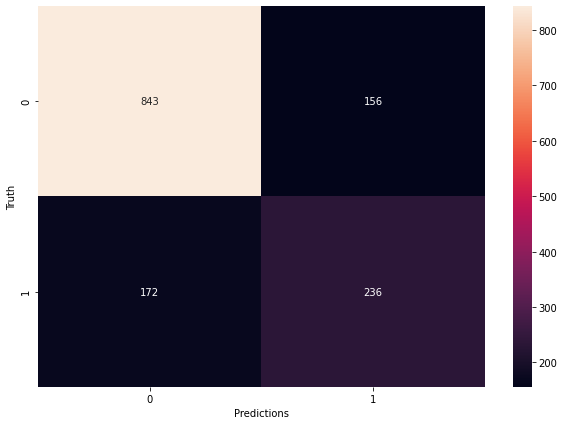

In [262]:
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')

## Accuracy

In [265]:
round((843+236)/(843+236+172+156),2)

0.77

### Precision for class 0

In [277]:
round(843/(843+172),2)*100

83.0

### Precision for class 1

In [276]:
round(236/(236+156),2)*100

60.0

### Recall for class 0

In [279]:
round(843/(843+156),2)

0.84

### Recall for class 1

In [283]:
round(236/(236+172),2)

0.58